<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Benjamín Aguilar
- Nombre de alumno 2: Sebastián Vásquez

### **Link de repositorio de GitHub:** `https://github.com/sbstnvsqz0/MDS7202`

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [2]:
# Leer el dataset
df = pd.read_csv("datos_lab8/fruit_vegetables.csv")

In [3]:
df.head(5)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [4]:
# Crear máscara con elementos de búsqueda y seleccionar
mask_products = df.Commodity.apply(lambda x: ("Tomato" in x and "Local" in x) or 
                                "Lettuce" in x or
                                 "Apple" in x  or 
                                  "Banana" in x or 
                                   "Tofu" in x)
mask_kg = (df.Unit == "Kg") | (df.Unit=="KG")

In [5]:
df_to_search = df[mask_products & mask_kg]
df_to_search.head(5)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
40,40,Lettuce,2013-06-16,Kg,55.0,60.0,57.5
48,48,Tofu,2013-06-16,Kg,55.0,60.0,57.5
50,50,Apple(Jholey),2013-06-16,Kg,100.0,120.0,110.0
75,75,Tomato Small(Local),2013-06-17,Kg,20.0,25.0,22.5


In [6]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo
serie = df_to_search.groupby("Date").agg("sum")["Average"]

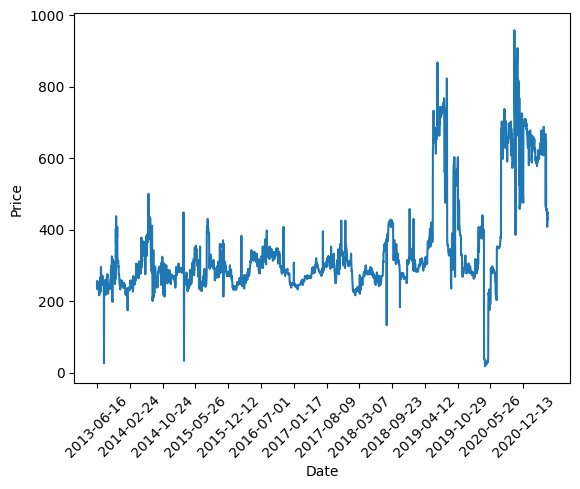

In [7]:
# Graficar serie de tiempo
plt.plot(serie.index,serie.values)
plt.xticks(ticks = serie.index.tolist()[::200],rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [8]:
# Realizar descomposición de la señal, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(serie,period=365)

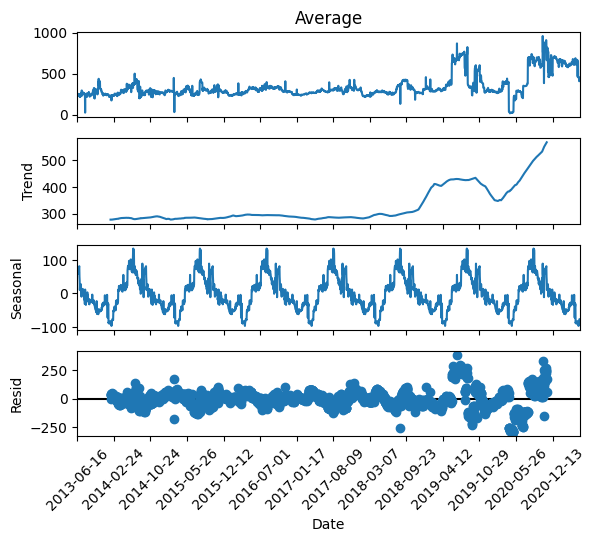

In [9]:
result.plot()
plt.xlabel("Date")
plt.xticks(ticks = serie.index.tolist()[::200],rotation=45)
plt.show()

In [10]:
to_df = {"Date":np.array(serie.index.tolist()),"Average":np.array(serie.values.tolist())}
df_serie = pd.DataFrame(to_df)
df_serie["Date"] = pd.to_datetime(df_serie["Date"])

In [11]:
# Realizar Hold Out de 70/30
pivot = df_serie.loc[np.quantile(np.array(df_serie.index.tolist()),q=0.8).round(0)].Date
df_serie["set"] = np.where(df_serie.Date >= pivot,"test","train")

Text(0.5, 1.0, 'Conjunto con Hold-Out 80/20')

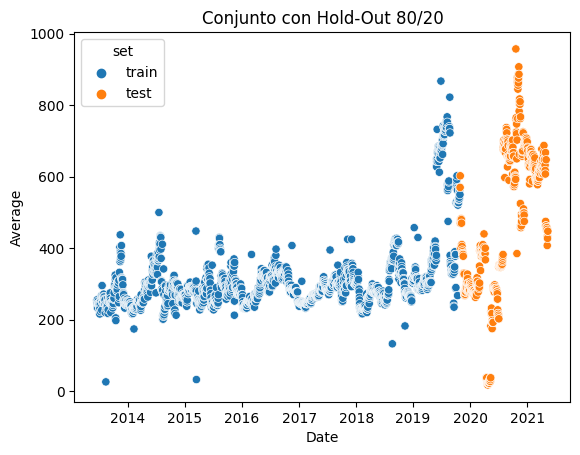

In [15]:
sns.scatterplot(data=df_serie,x='Date',y='Average',hue='set').set_title("Conjunto con Hold-Out 80/20")

#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [146]:
#instalamos prophet
!pip install prophet

  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.5 MB/s eta 0:00:09
   ------- -------------------------------- 2.5/13.3 MB 26.0 MB/s eta 0:00:01
   ------------------- -------------------- 6.6/13.3 MB 46.8 MB/s eta 0:00:01
   ----------------------------------- ---- 11.7/13.3 MB 93.9 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 81.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.4 kB ? eta -:--:--
   ---------------------------------------- 94.4/94.4 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 68.1 MB/s eta 0:00:00
Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)


In [16]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


**1. Generar dataframes de entrenamiento y testeo**

In [17]:
# Respuesta
df_serie.columns=["ds","y","set"]
train = df_serie[df_serie["set"]=="train"].copy()
test = df_serie[df_serie["set"]=="test"].copy()

target = "Average"

df_train = train.drop(columns=["set"])
df_test = test.drop(columns = ['set'])
y_test = test.y.copy()
df_test = df_test.drop(columns=["y"])

**2. Modelo y entrenamiento**

In [20]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(df_train)


13:36:55 - cmdstanpy - INFO - Chain [1] start processing
13:36:56 - cmdstanpy - INFO - Chain [1] done processing


**3. Predicción.**

¿Qué muestra el dataframe de predicción una vez realizada la predicción? ¿Qué siginifican las distintas columnas?

In [21]:
# Respuesta
prediction = model.predict(df_test)

In [22]:
prediction.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-29,530.517300,471.848184,622.350435,530.517300,530.517300,15.600838,15.600838,15.600838,-1.436708,-1.436708,-1.436708,17.037546,17.037546,17.037546,0.0,0.0,0.0,546.118138
1,2019-10-30,531.072273,475.263747,625.829767,531.072273,531.072273,17.919494,17.919494,17.919494,0.502087,0.502087,0.502087,17.417407,17.417407,17.417407,0.0,0.0,0.0,548.991767
2,2019-10-31,531.627245,468.072527,621.197027,531.627245,531.627245,17.608808,17.608808,17.608808,-0.173215,-0.173215,-0.173215,17.782024,17.782024,17.782024,0.0,0.0,0.0,549.236053


Columnas:
- trend y asociados: Se refiere al componente de tendencia el cual captura el movimiento de los datos, dando noción del comportamiento creciente o decreciente de estos. Los lower y upper representan la incertidumbre por arriba y abajo para el valor de trend.
- yhat y asociados: Se refiere a la predicción propiamente tal. Luego los yhat lower y upper se refieren a la incertidumbre de este
- additive_terms y asociados: Es la suma de componentes que se le agregan a la predicción los cuales vienen dados por tendencias semanales y anuales. Los lower y upper nuevamente se refieren a la incertidumbre de este valor.
- weekly y asociados: Valor asociado a las tendencias semanales. Los lower y upper se refieren a la incertidumbre de este valor.
- yearly y asociados: Valor asociado a las tendencias anuales. Los lower y upper se refieren a la incertidumbre de este valor.
- multiplicative_terms y asociados: Estos valores son ascoiados a valores que se multiplican con la predicción los cuales varían segun tendencias. Los lower y upper apuntan a la incertidumbre de este valor. En este caso, la descomposición es aditiva, con lo cual no se consideran.



**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


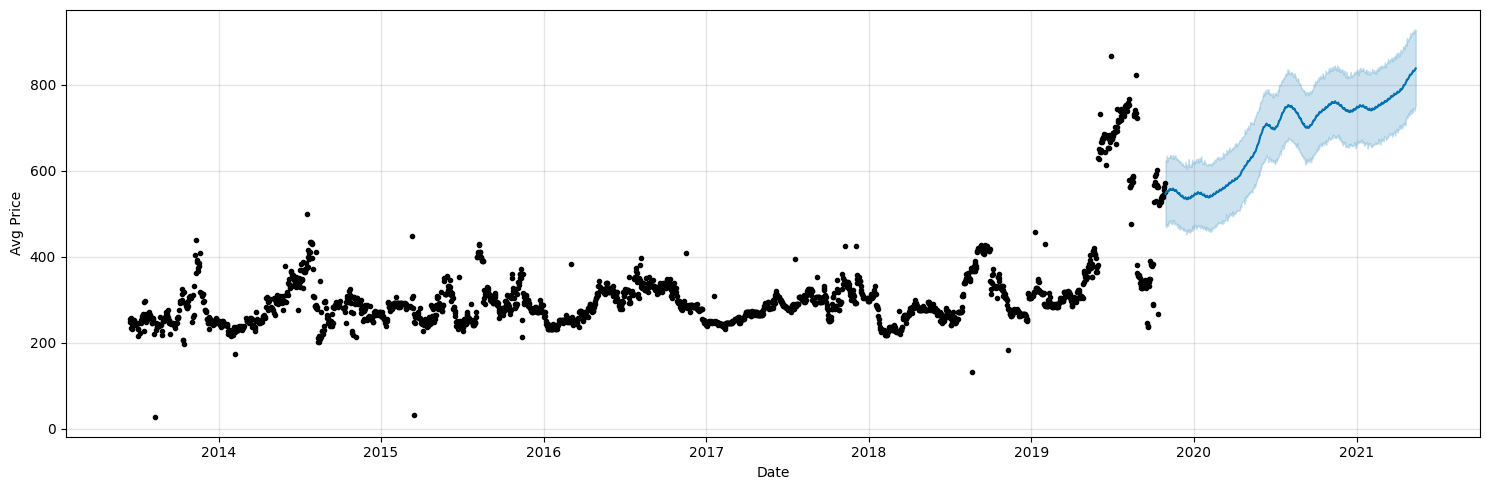

In [23]:
# plot forecast, estático.
f,ax = plt.subplots(1,1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(prediction, ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Avg Price")
plt.show()

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

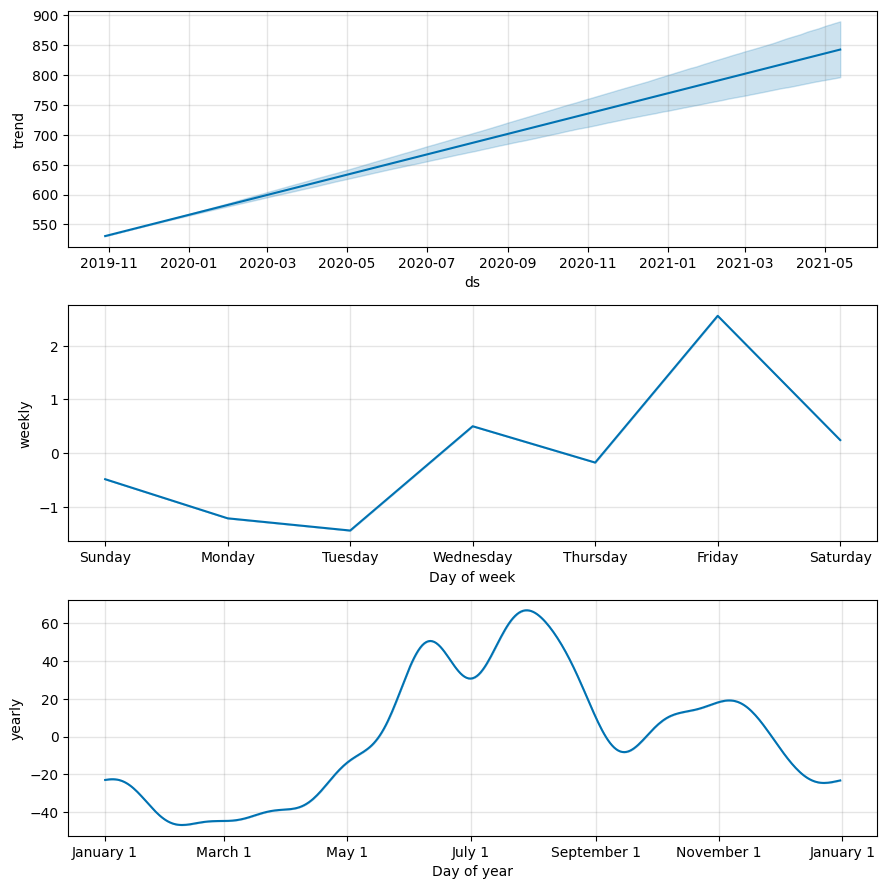

In [24]:
# descomposición por componentes, estático
fig = model.plot_components(prediction)

#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

In [25]:
# Respuesta
q_15 = np.quantile(np.array(prediction.index.tolist()),q=0.15).round(0)
q_50 = np.quantile(np.array(prediction.index.tolist()),q=0.50).round(0)

In [26]:
df_test = df_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

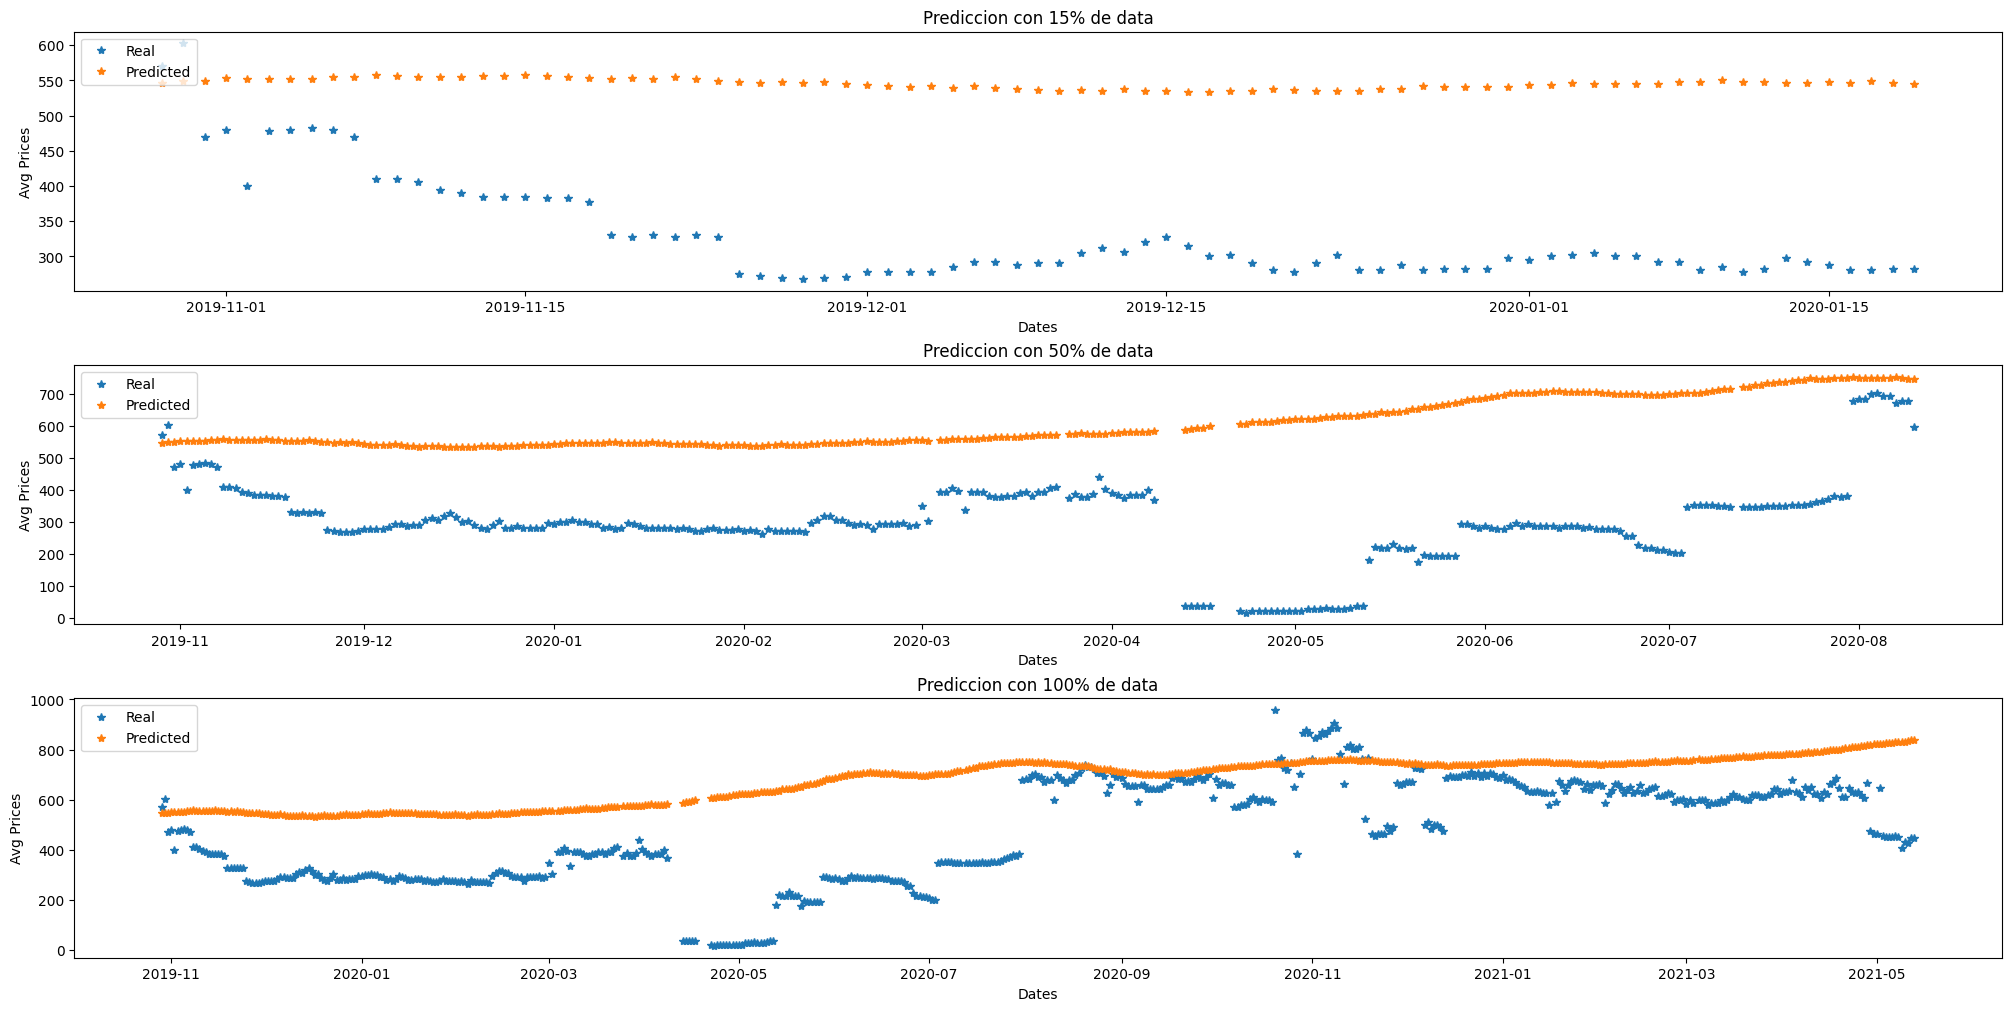

In [27]:
fig, axis = plt.subplots(3,1,constrained_layout=True)
fig.set_size_inches(20,10)
axis[0].plot(df_test.loc[:q_15].ds,y_test.loc[:q_15],'*',label="Real")
axis[0].plot(prediction.loc[:q_15].ds,prediction.loc[:q_15].yhat, '*',label="Predicted")
axis[0].legend(loc="upper left")
axis[0].set_title(f"Prediccion con 15% de data")
axis[0].set_xlabel("Dates")
axis[0].set_ylabel("Avg Prices")

axis[1].plot(df_test.loc[:q_50].ds,y_test.loc[:q_50],'*',label="Real")
axis[1].plot(prediction.loc[:q_50].ds,prediction.loc[:q_50].yhat, '*',label="Predicted")
axis[1].legend(loc="upper left")
axis[1].set_title(f"Prediccion con 50% de data")
axis[1].set_xlabel("Dates")
axis[1].set_ylabel("Avg Prices")

axis[2].plot(df_test.ds,y_test,'*',label="Real")
axis[2].plot(prediction.ds,prediction.yhat, '*',label="Predicted")
axis[2].legend(loc="upper left")
axis[2].set_title(f"Prediccion con 100% de data")
axis[2].set_xlabel("Dates")
axis[2].set_ylabel("Avg Prices")

plt.show()


In [28]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
def metrics(y_true,y_pred):
    ret_dict = {"RMSE":root_mean_squared_error(y_true,y_pred),"MAE":mean_absolute_error(y_true,y_pred),"MAPE":mean_absolute_percentage_error(y_true,y_pred)}
    return ret_dict

In [29]:
df_res1 = pd.DataFrame(metrics(y_test,prediction.yhat),index=["1er Modelo"])
df_res1

,RMSE,MAE,MAPE
1er Modelo,259.561873,212.892859,1.570752


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


In [57]:
#Parte 2013-06-16 hasta 2021-05-12
holidays_dates = ['2013-06-29','2013-07-16','2013-08-15','2013-08-20','2013-09-18','2013-09-19','2013-09-20','2013-10-12','2013-10-31','2013-11-01','2013-12-25',
 '2014-01-01','2014-04-18','2014-04-19','2014-04-20','2014-05-01','2014-05-21','2014-06-07','2014-07-16','2014-08-15','2014-08-20','2014-09-18','2014-09-19','2014-10-31','2014-11-01','2014-12-08','2014-12-25',
 '2015-01-01','2015-04-03','2015-04-04','2015-05-01','2015-05-21','2015-06-29','2015-07-16','2015-08-15','2015-08-20','2015-09-18','2015-09-19','2015-10-12','2015-10-31','2015-12-08','2015-12-25',
 '2016-01-01','2016-03-25','2016-03-26','2016-05-21','2016-06-07','2016-06-27','2016-07-16','2016-08-15','2016-08-20','2016-09-19','2016-10-10','2016-10-31','2016-11-01','2016-12-08','2016-12-25',
 '2017-01-01','2017-04-14','2017-04-15','2017-06-07','2017-06-26','2017-08-15','2017-09-18','2017-09-19','2017-10-09','2017-10-27','2017-11-01','2017-12-08','2017-12-25',
 '2018-01-01','2018-03-30','2018-03-31','2018-05-01','2018-05-21','2018-06-07','2018-07-02','2018-07-16','2018-08-15','2018-08-20','2018-09-17','2018-09-18','2018-09-19','2018-10-15','2018-11-01','2018-11-02','2018-12-08','2018-12-25',
 '2019-01-01']
#Desde 2019-01-27 a 2021-05-13
holidays_dates += ['2019-04-19','2019-04-20','2019-05-01','2019-05-21','2019-06-07','2019-06-29','2019-07-16','2019-08-15','2019-08-20','2019-09-18','2019-09-19','2019-09-20','2019-10-12','2019-10-31','2019-11-01','2019-12-25',
'2020-01-01','2020-04-10','2020-04-11','2020-05-01','2020-05-21','2020-06-29','2020-07-16','2020-08-15','2020-08-20','2020-09-18','2020-09-19','2020-10-12','2020-10-31','2020-12-08','2020-12-25',
'2021-01-01','2021-04-02','2021-04-03']

holidays_df = pd.DataFrame({'holiday':'feriado',
                            'ds':pd.to_datetime(holidays_dates)
    
})

**1. Festividades y agregar a modelo**

In [58]:
model = Prophet(holidays=holidays_df)
model.add_country_holidays(country_name="CL")
model.fit(df_train)

05:18:17 - cmdstanpy - INFO - Chain [1] start processing
05:18:17 - cmdstanpy - INFO - Chain [1] done processing


**2. Predecir**

In [59]:
# Respuesta
results_holidays = model.predict(df_test)

**3. Resultados**

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

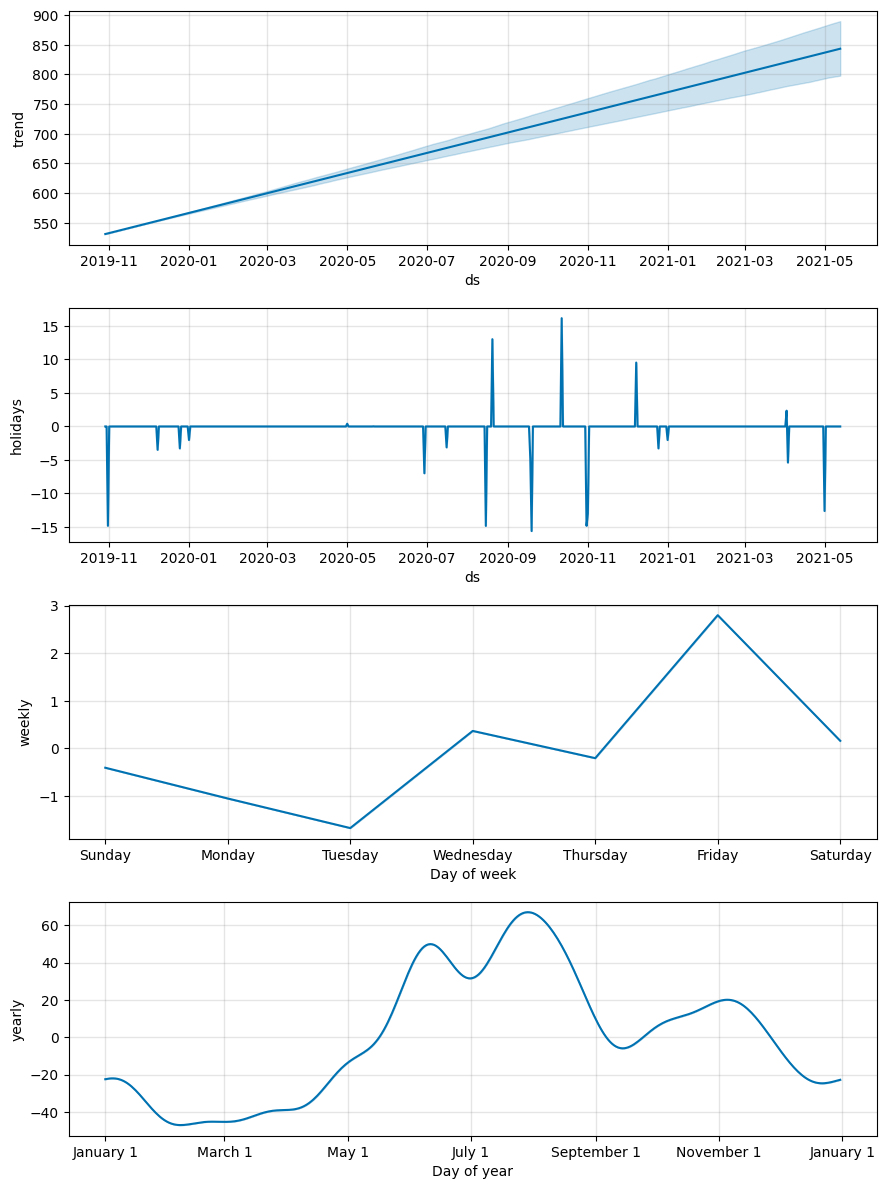

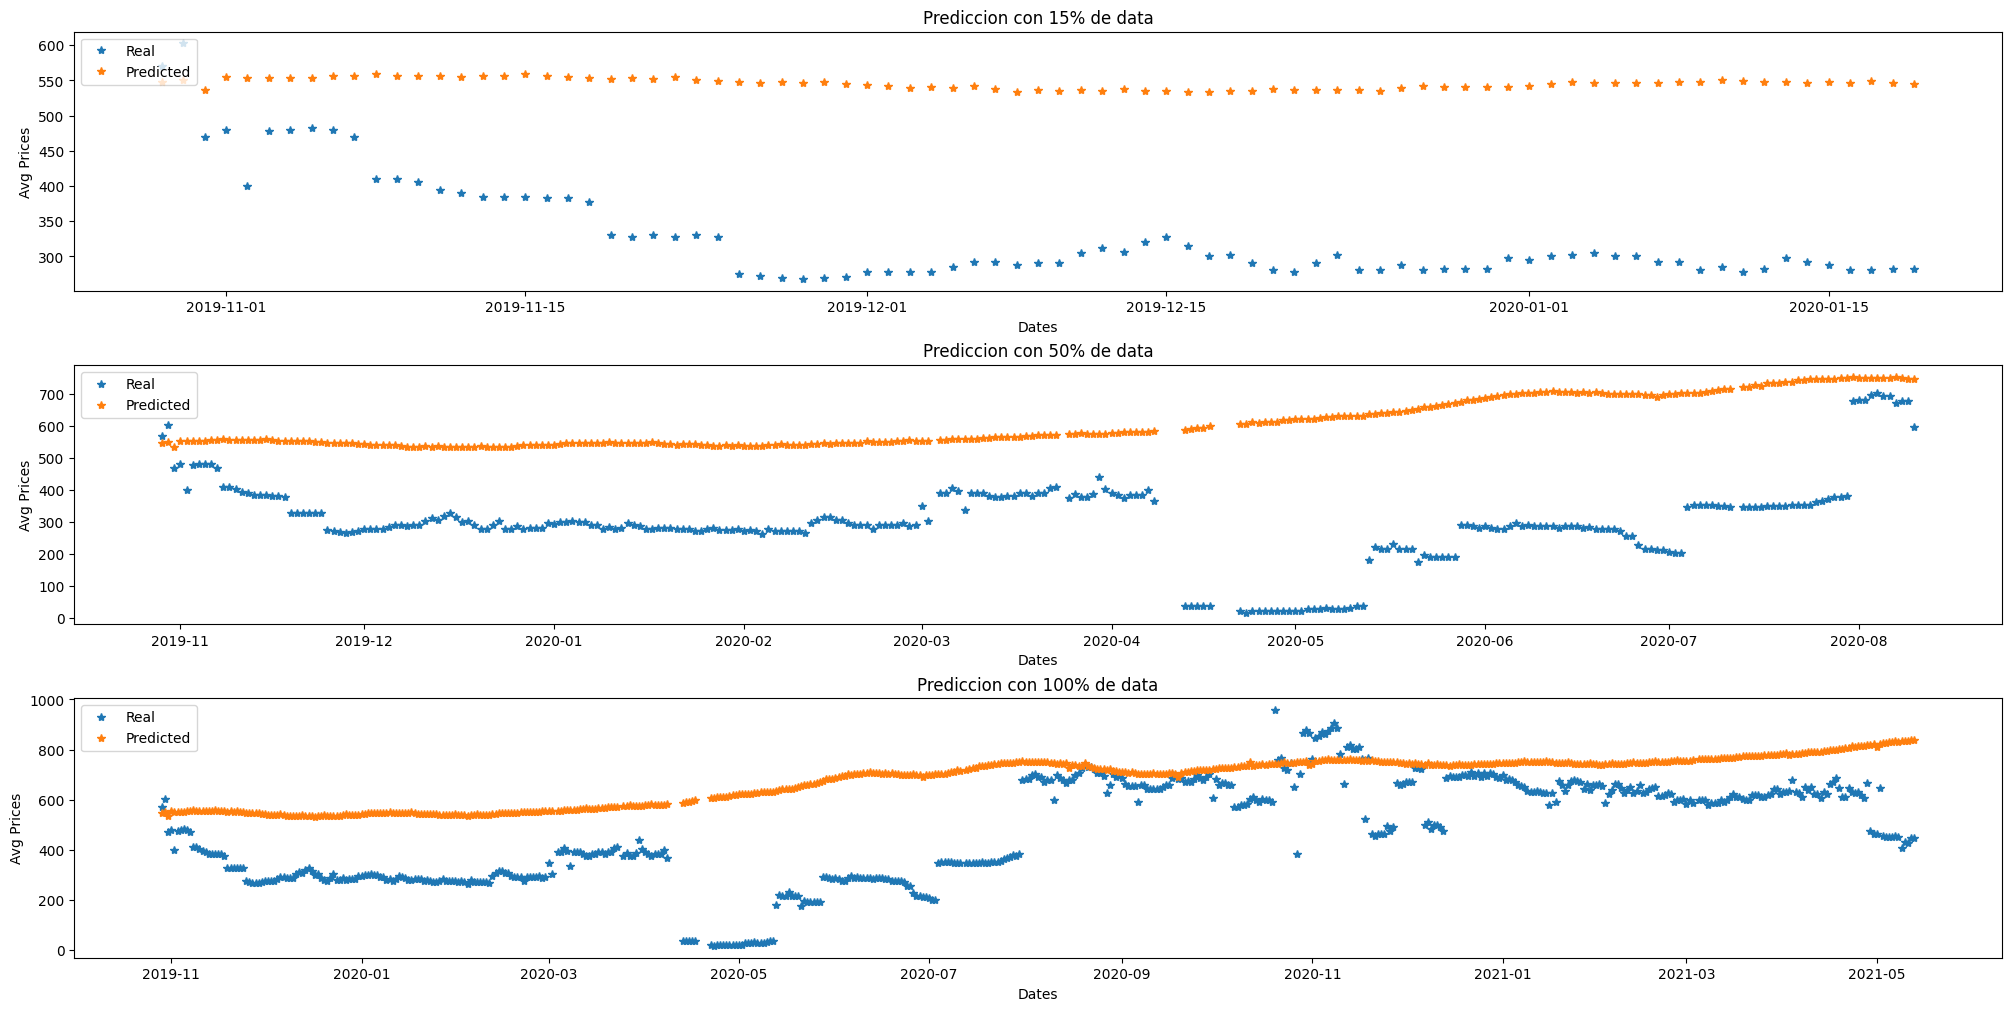

,RMSE,MAE,MAPE
Modelo con holidays,259.876464,213.335394,1.572464


In [60]:
# Respuesta

#plot de componentes
fig = model.plot_components(results_holidays)
plt.plot()
#plot de predicción
fig, axis = plt.subplots(3,1,constrained_layout=True)
fig.set_size_inches(20,10)
axis[0].plot(df_test.loc[:q_15].ds,y_test.loc[:q_15],'*',label="Real")
axis[0].plot(results_holidays.loc[:q_15].ds,results_holidays.loc[:q_15].yhat, '*',label="Predicted")
axis[0].legend(loc="upper left")
axis[0].set_title(f"Prediccion con 15% de data")
axis[0].set_xlabel("Dates")
axis[0].set_ylabel("Avg Prices")

axis[1].plot(df_test.loc[:q_50].ds,y_test.loc[:q_50],'*',label="Real")
axis[1].plot(results_holidays.loc[:q_50].ds,results_holidays.loc[:q_50].yhat, '*',label="Predicted")
axis[1].legend(loc="upper left")
axis[1].set_title(f"Prediccion con 50% de data")
axis[1].set_xlabel("Dates")
axis[1].set_ylabel("Avg Prices")

axis[2].plot(df_test.ds,y_test,'*',label="Real")
axis[2].plot(results_holidays.ds,results_holidays.yhat, '*',label="Predicted")
axis[2].legend(loc="upper left")
axis[2].set_title(f"Prediccion con 100% de data")
axis[2].set_xlabel("Dates")
axis[2].set_ylabel("Avg Prices")

plt.show()
#resultados
df_res2 = pd.DataFrame(metrics(y_test,results_holidays.yhat),index=["Modelo con holidays"])
df_res2

In [61]:
df_merged = pd.concat([df_res1,df_res2])

In [62]:
df_merged

,RMSE,MAE,MAPE
1er Modelo,259.561873,212.892859,1.570752
Modelo con holidays,259.876464,213.335394,1.572464


¿Son más precisas las predicciones? ¿Qué otro festividad podría afectar a los precios de las frutas y verduras?

Son ligeramente peores, sin embargo, no representa un empeoramiento significativo al revisar las métricas obtenidas. Dentro de otras festividades que pueden afectar, vendrían las fiestas locales que dependenden exclusivamente de la ciudad/pueblo de donde se haya tomado el muestreo, partidos de la selección (principalmente en verduras para acompañar asados), días asociados al veganismo, etc.

#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

In [63]:
# Respuesta
def winter_days(ds,first_year,last_year):
    date = pd.to_datetime(ds)
    masks = [date.apply(lambda x: (x>=pd.to_datetime(f'{year}-06-21')) & (x<=pd.to_datetime(f'{year}-09-21'))) for year in range(first_year,last_year)]
    final_mask = np.array([False]*len(ds))
    for mask in masks:
        final_mask|=mask.values
    return [1 if value else 0 for value in final_mask]


In [64]:
df_train["winter"] = winter_days(df_train.ds,2013,2019)
df_test["winter"] = winter_days(df_test.ds,2019,2021)

In [65]:
model = Prophet()
model.add_regressor("winter")
model.fit(df_train)

05:23:18 - cmdstanpy - INFO - Chain [1] start processing
05:23:18 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
winter_results = model.predict(df_test)

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

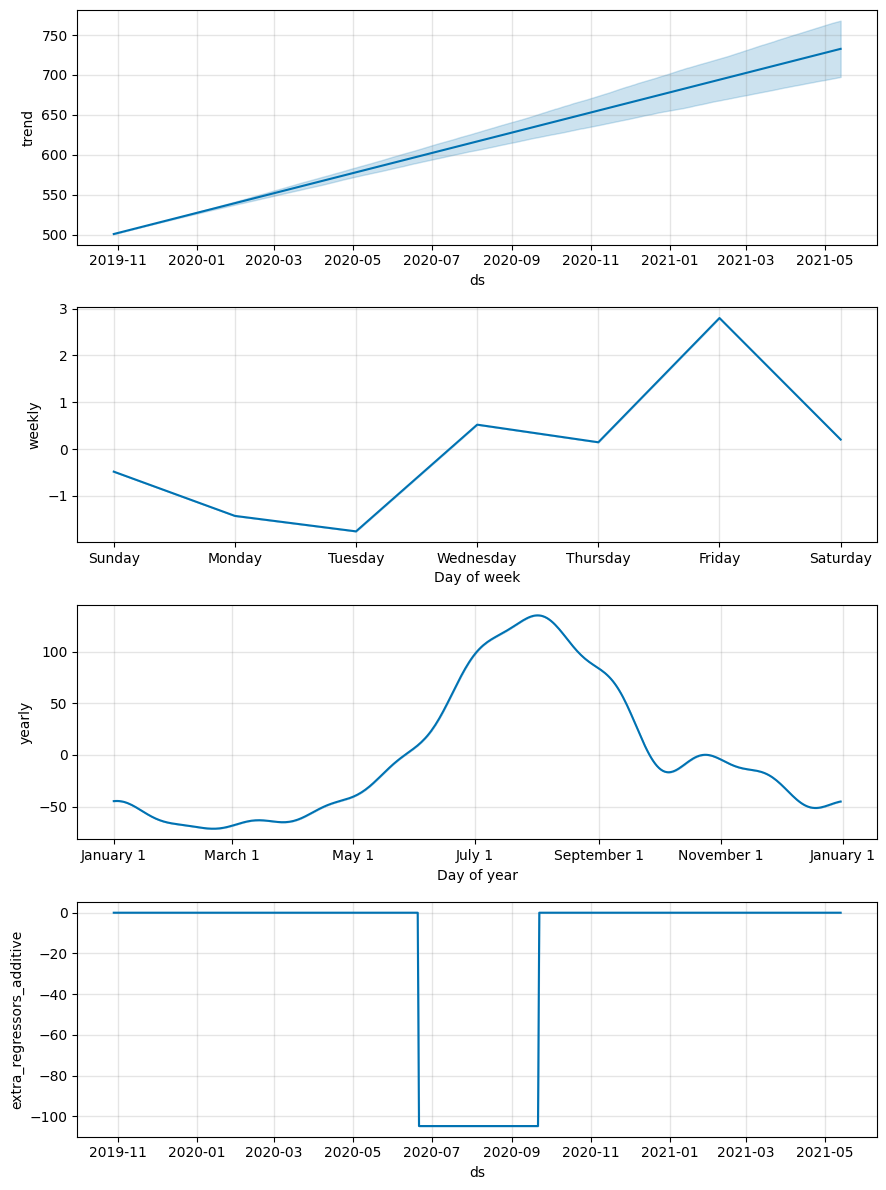

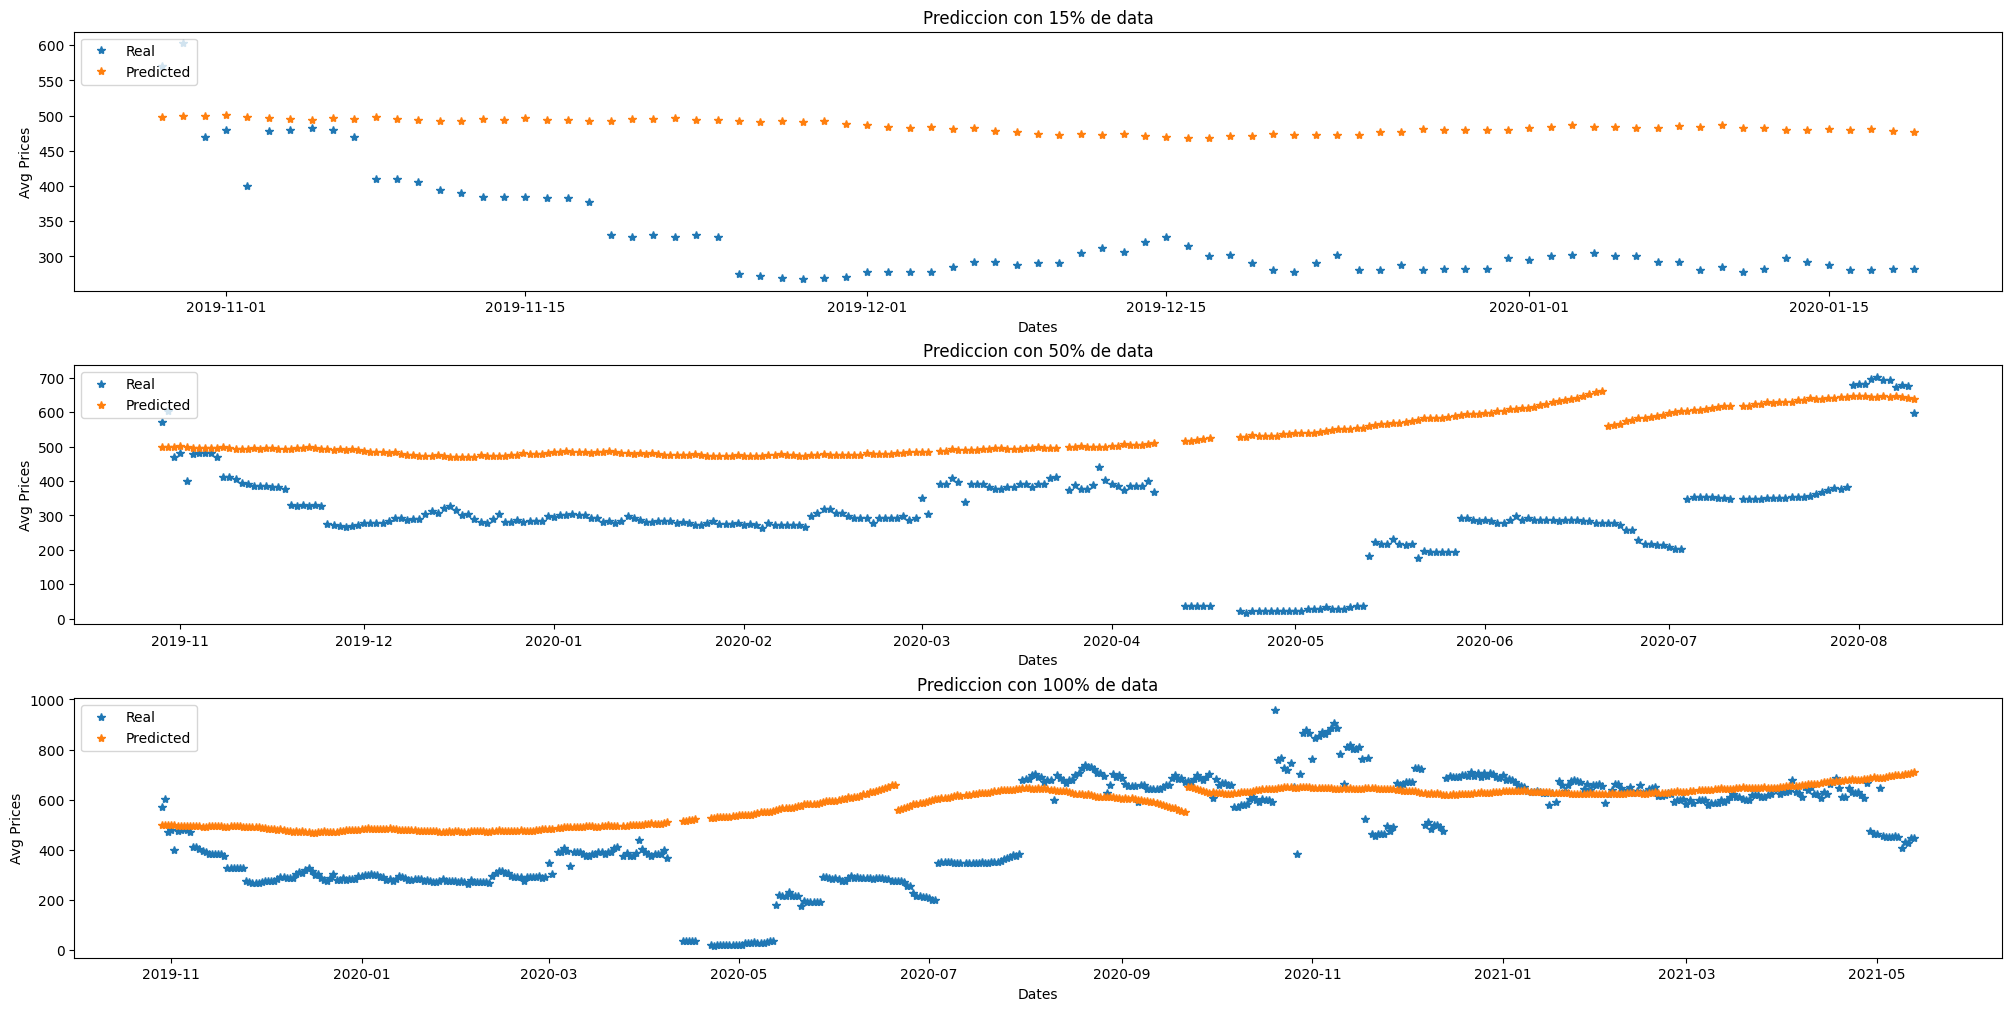

,RMSE,MAE,MAPE
Modelo con regresores adicionales,200.432158,153.131603,1.27931


In [67]:
# Respuesta

#plot de componentes
fig = model.plot_components(winter_results)
plt.plot()
#plot de predicción
fig, axis = plt.subplots(3,1,constrained_layout=True)
fig.set_size_inches(20,10)
axis[0].plot(df_test.loc[:q_15].ds,y_test.loc[:q_15],'*',label="Real")
axis[0].plot(winter_results.loc[:q_15].ds,winter_results.loc[:q_15].yhat, '*',label="Predicted")
axis[0].legend(loc="upper left")
axis[0].set_title(f"Prediccion con 15% de data")
axis[0].set_xlabel("Dates")
axis[0].set_ylabel("Avg Prices")

axis[1].plot(df_test.loc[:q_50].ds,y_test.loc[:q_50],'*',label="Real")
axis[1].plot(winter_results.loc[:q_50].ds,winter_results.loc[:q_50].yhat, '*',label="Predicted")
axis[1].legend(loc="upper left")
axis[1].set_title(f"Prediccion con 50% de data")
axis[1].set_xlabel("Dates")
axis[1].set_ylabel("Avg Prices")

axis[2].plot(df_test.ds,y_test,'*',label="Real")
axis[2].plot(winter_results.ds,winter_results.yhat, '*',label="Predicted")
axis[2].legend(loc="upper left")
axis[2].set_title(f"Prediccion con 100% de data")
axis[2].set_xlabel("Dates")
axis[2].set_ylabel("Avg Prices")

plt.show()
#resultados
df_res3 = pd.DataFrame(metrics(y_test,winter_results.yhat),index=["Modelo con regresores adicionales"])
df_res3

In [68]:
df_merged = pd.concat([df_merged,df_res3])

In [69]:
df_merged

,RMSE,MAE,MAPE
1er Modelo,259.561873,212.892859,1.570752
Modelo con holidays,259.876464,213.335394,1.572464
Modelo con regresores adicionales,200.432158,153.131603,1.279310


Al adicionar el regresor, los resultados mejoran bastante, pudiendo ajustar de mejor manera los comportamientos del modelo fuera del invierno más que nada. Además se ve que en la época de invierno baja el precio (contrario a lo que se creía), con lo cual seguramente la base de datos no pertenezca a Chile.

# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [ ]:
# se instala surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162995 sha256=7f096d46a15cbf79732cc92fb0ca2f0401649c80906e96bddfe4e66ddd4ef445
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [ ]:
df = pd.read_parquet('ratings_Electronics.parquet')
df.head()

,user_id,prod_id,rating
189,3188,0,5.0
200,4980,0,4.0
314,5374,0,5.0
389,6293,0,5.0
406,4879,0,3.0


### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [ ]:
# Respuesta

Verificar que no hayan valores nulos

In [ ]:
# Respuesta

Graficar distribución de los ratings

In [ ]:
# Respuesta

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [ ]:
# Respuesta

A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aquí:

1.
2.
3.

## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [ ]:
reader = Reader(rating_scale=(0,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [ ]:
from surprise.model_selection import train_test_split

# Respuesta

## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

In [ ]:
from surprise.prediction_algorithms.random_pred import NormalPredictor

# Respuesta

In [ ]:
# Evaluar con MAE

## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [ ]:
def get_user_top_k(predictions, user, k = 10):

  # predecir los rating filtrados por usuario user
  predicted_ratings =

  # Ordenar las predicciones
  sorted_predicted_ratings =

  return sorted_predicted_ratings[:k]

In [ ]:
from surprise.accuracy import mse

# entrenar algoritmo

sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model =

# entrenar

#predecir en dataframe de testeo

predictions =  # retornar un dataframe con el rating estimado para cada (user_id, item_id)

# obtener mse


Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2122
[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[(2679, 5),
 (1326, 4.799755049750801),
 (4650, 4.399861310283875),
 (1692, 4.333333333333333),
 (4363, 4.199459547276517)]

In [ ]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

In [ ]:
# entrenar algoritmo base a items, obtener MSE

sim_options =

# algoritmo base a items.

item_model =

# entrenar

#predecir en dataframe de testeo

predictions =

# obtener mse

In [ ]:
example = [(3, 3906, None)]
print(item_model.test(example))

get_user_top_k(predictions, user = 2170, k = 5)

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [ ]:
# Respuesta

model =

# predicciones, retornar un dataframe con el rating estimado para cada (user_id, item_id)

predictions =

In [ ]:
# calcular mae
from surprise.accuracy import mae
mae(predictions)

###**Comentarios Finales**

* ¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?
* ¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.